In [8]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.text as txt
import matplotlib.lines as lines
import time

from IPython import display
import pylab as pl
%matplotlib inline

## Perceptron Demo

In [2]:
#set parameters
num0 = 6
num1 = 6
marg_size = 0.3

In [3]:
#generate a sample data set
alpha = marg_size/2
angs0 = np.r_[np.array([[alpha],[np.pi-alpha]]),(np.pi-2*alpha)*np.random.rand(num0-2,1)+alpha]
angs1 = np.r_[np.array([[-alpha],[-np.pi+alpha]]),(-np.pi+2*alpha)*np.random.rand(num0-2,1)-alpha]
rota = np.random.rand()*np.pi
angs0 = np.mod(angs0+rota,2*np.pi)
angs1 = np.mod(angs1+rota,2*np.pi)
x0 = np.c_[np.cos(angs0),np.sin(angs0)]
x1 = np.c_[np.cos(angs1),np.sin(angs1)]
x = np.r_[x0,x1]
#generate labels
y = np.r_[-1*np.ones([num0,1]),np.ones([num1,1])]
#[repmat(-1,num0,1); repmat(+1,num1,1)];

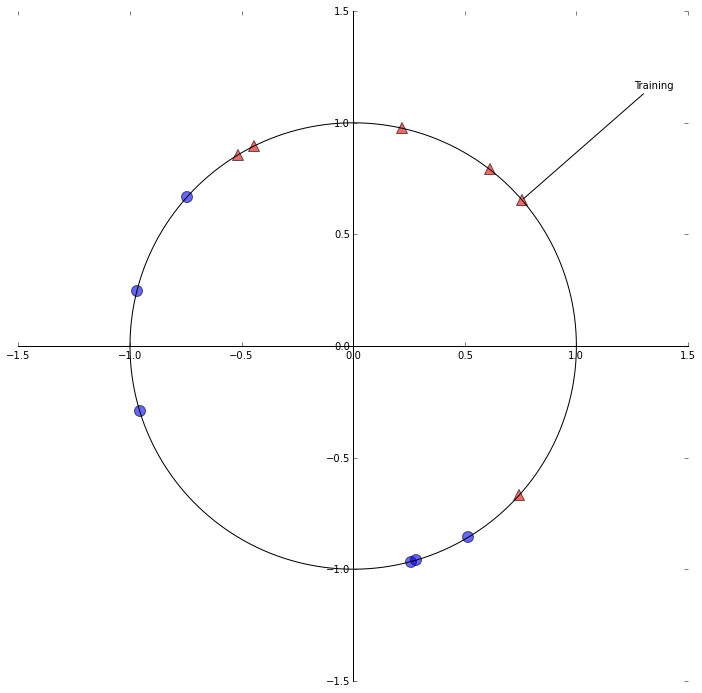

NameError: name 'matplotlib' is not defined

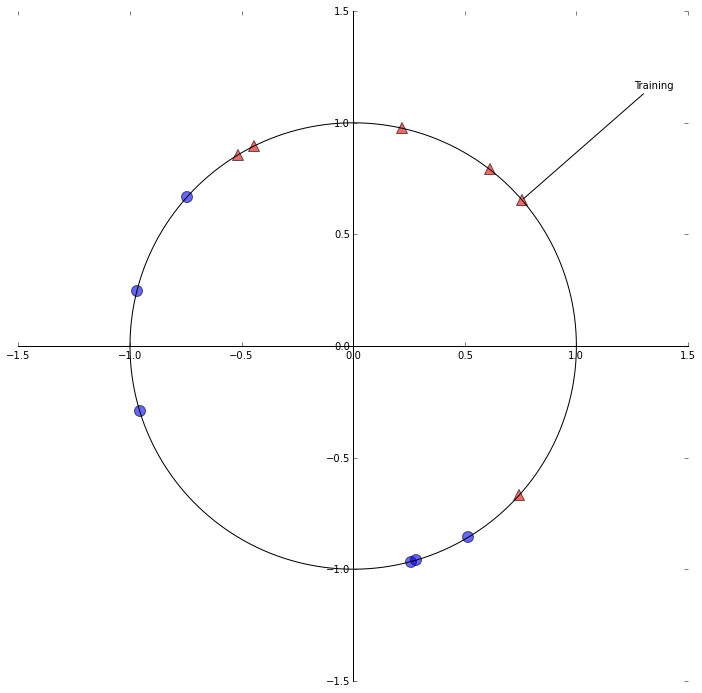

In [7]:
#show the data
fig = plt.figure(figsize=(12, 12))

#ax = fig.add_subplot(111)
a = np.arange(0,np.pi,0.001)
#ax.plot(np.cos(a),np.sin(a),c='k')
#ax.plot(np.cos(a),-np.sin(a),c='k')
pl.plot(np.cos(a),np.sin(a),c='k')
pl.plot(np.cos(a),-np.sin(a),c='k')
ax = pl.gca()
# following four lines are just to center the axes
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
# add data
ax.scatter(x0[:,0],x0[:,1],s=120,alpha=0.6,c='b',marker='o')
ax.scatter(x1[:,0],x1[:,1],s=120,alpha=0.6,c='r',marker='^')
#initialize weights
w = np.array([0,0])
r = np.random.permutation(num0+num1)
u = False
for iter in range(2):
    for ind in r:
        # label the current training instance
        an = txt.Annotation("Training",xy=x[ind,:],xytext=(x[ind,0]+0.5, x[ind,1]+0.5),arrowprops=dict(arrowstyle="-")) 
        ax.add_artist(an)
        display.clear_output(wait=True)
        display.display(pl.gcf())
        # get prediction according to current w
        ypred = np.dot(x[ind,:],w)
        # check for mistakes
        if ypred*y[ind] <= 0:
            # update w
            w = w + y[ind]*x[ind,:]
            # plot w
            w0=w/np.linalg.norm(w);
            pt=[w0[1],-w0[0]];
            if u:
                ln.remove()
            ln = lines.Line2D([pt[0],-pt[0]],[pt[1], -pt[1]])
            ax.add_line(ln)
            u = True
        time.sleep(1.0)
        an.remove()